# Fraud Detection and Prediction

## Quantum Models Used :
* Variational Quantum Classifier


Both Over-Sampling and Under-Sampling is used 


# 0. Pre-requisite -> Loading Dataset
 - Fraud Detection dataset will be loaded from Kaggle
 - Link @link(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
 
*Note: - Run these steps only for the 1st time to download dataset from Kaggle*

In [1]:
! pip install --upgrade kaggle numpy pandas matplotlib seaborn pyyaml qiskit-aer pylatexenc

  Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata (60 kB)


In [2]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns
import os

import time

# 1. Data Exploration

## Load data from CSV file

In [3]:
from load_dataset import read_csv_file
df = read_csv_file('creditcardfraud.zip') # provide name of the zip file instead of csv file
df.describe().T # Data Summary

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

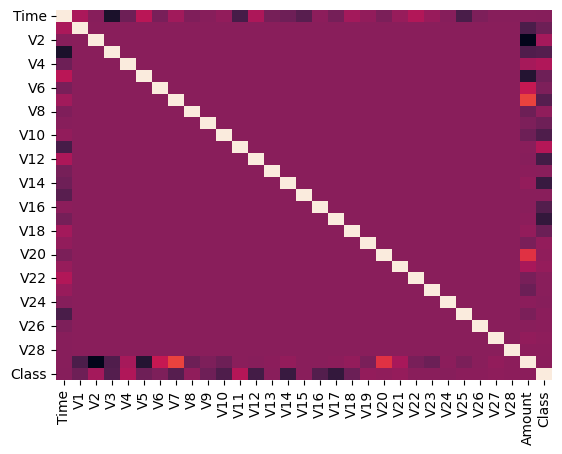

In [7]:
import seaborn as sns
sns.heatmap(df.corr(), annot=False, fmt=".2f", cbar=False)
plt.show()

## Understanding and evaluating data
* Since, we are unable to see data from other than Class 0, we need data evaluation.
* Plus, the number of instances of fraudelent data are less in numbers we need to pump-up the fraudelent data.

In [8]:
df.shape #Prints number of rows and columns

(284807, 31)

In [9]:
class_count = df["Class"].value_counts()
class_count

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
print("Class 0 :" , class_count[0])
print("Class 1 :" , class_count[1])

Class 0 : 284315
Class 1 : 492


In [11]:
df.shape

(284807, 31)

Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces
0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


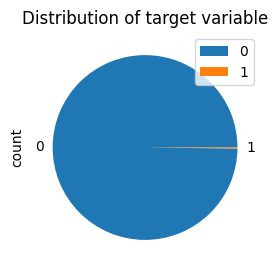

In [12]:
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)

# Target distribution
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, pieces')
target_count = df['Class'].value_counts()
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution "1" & "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)


pylab.rcParams['figure.figsize'] = (4, 3)
target_count.plot(kind='pie', title='Distribution of target variable', legend="true");

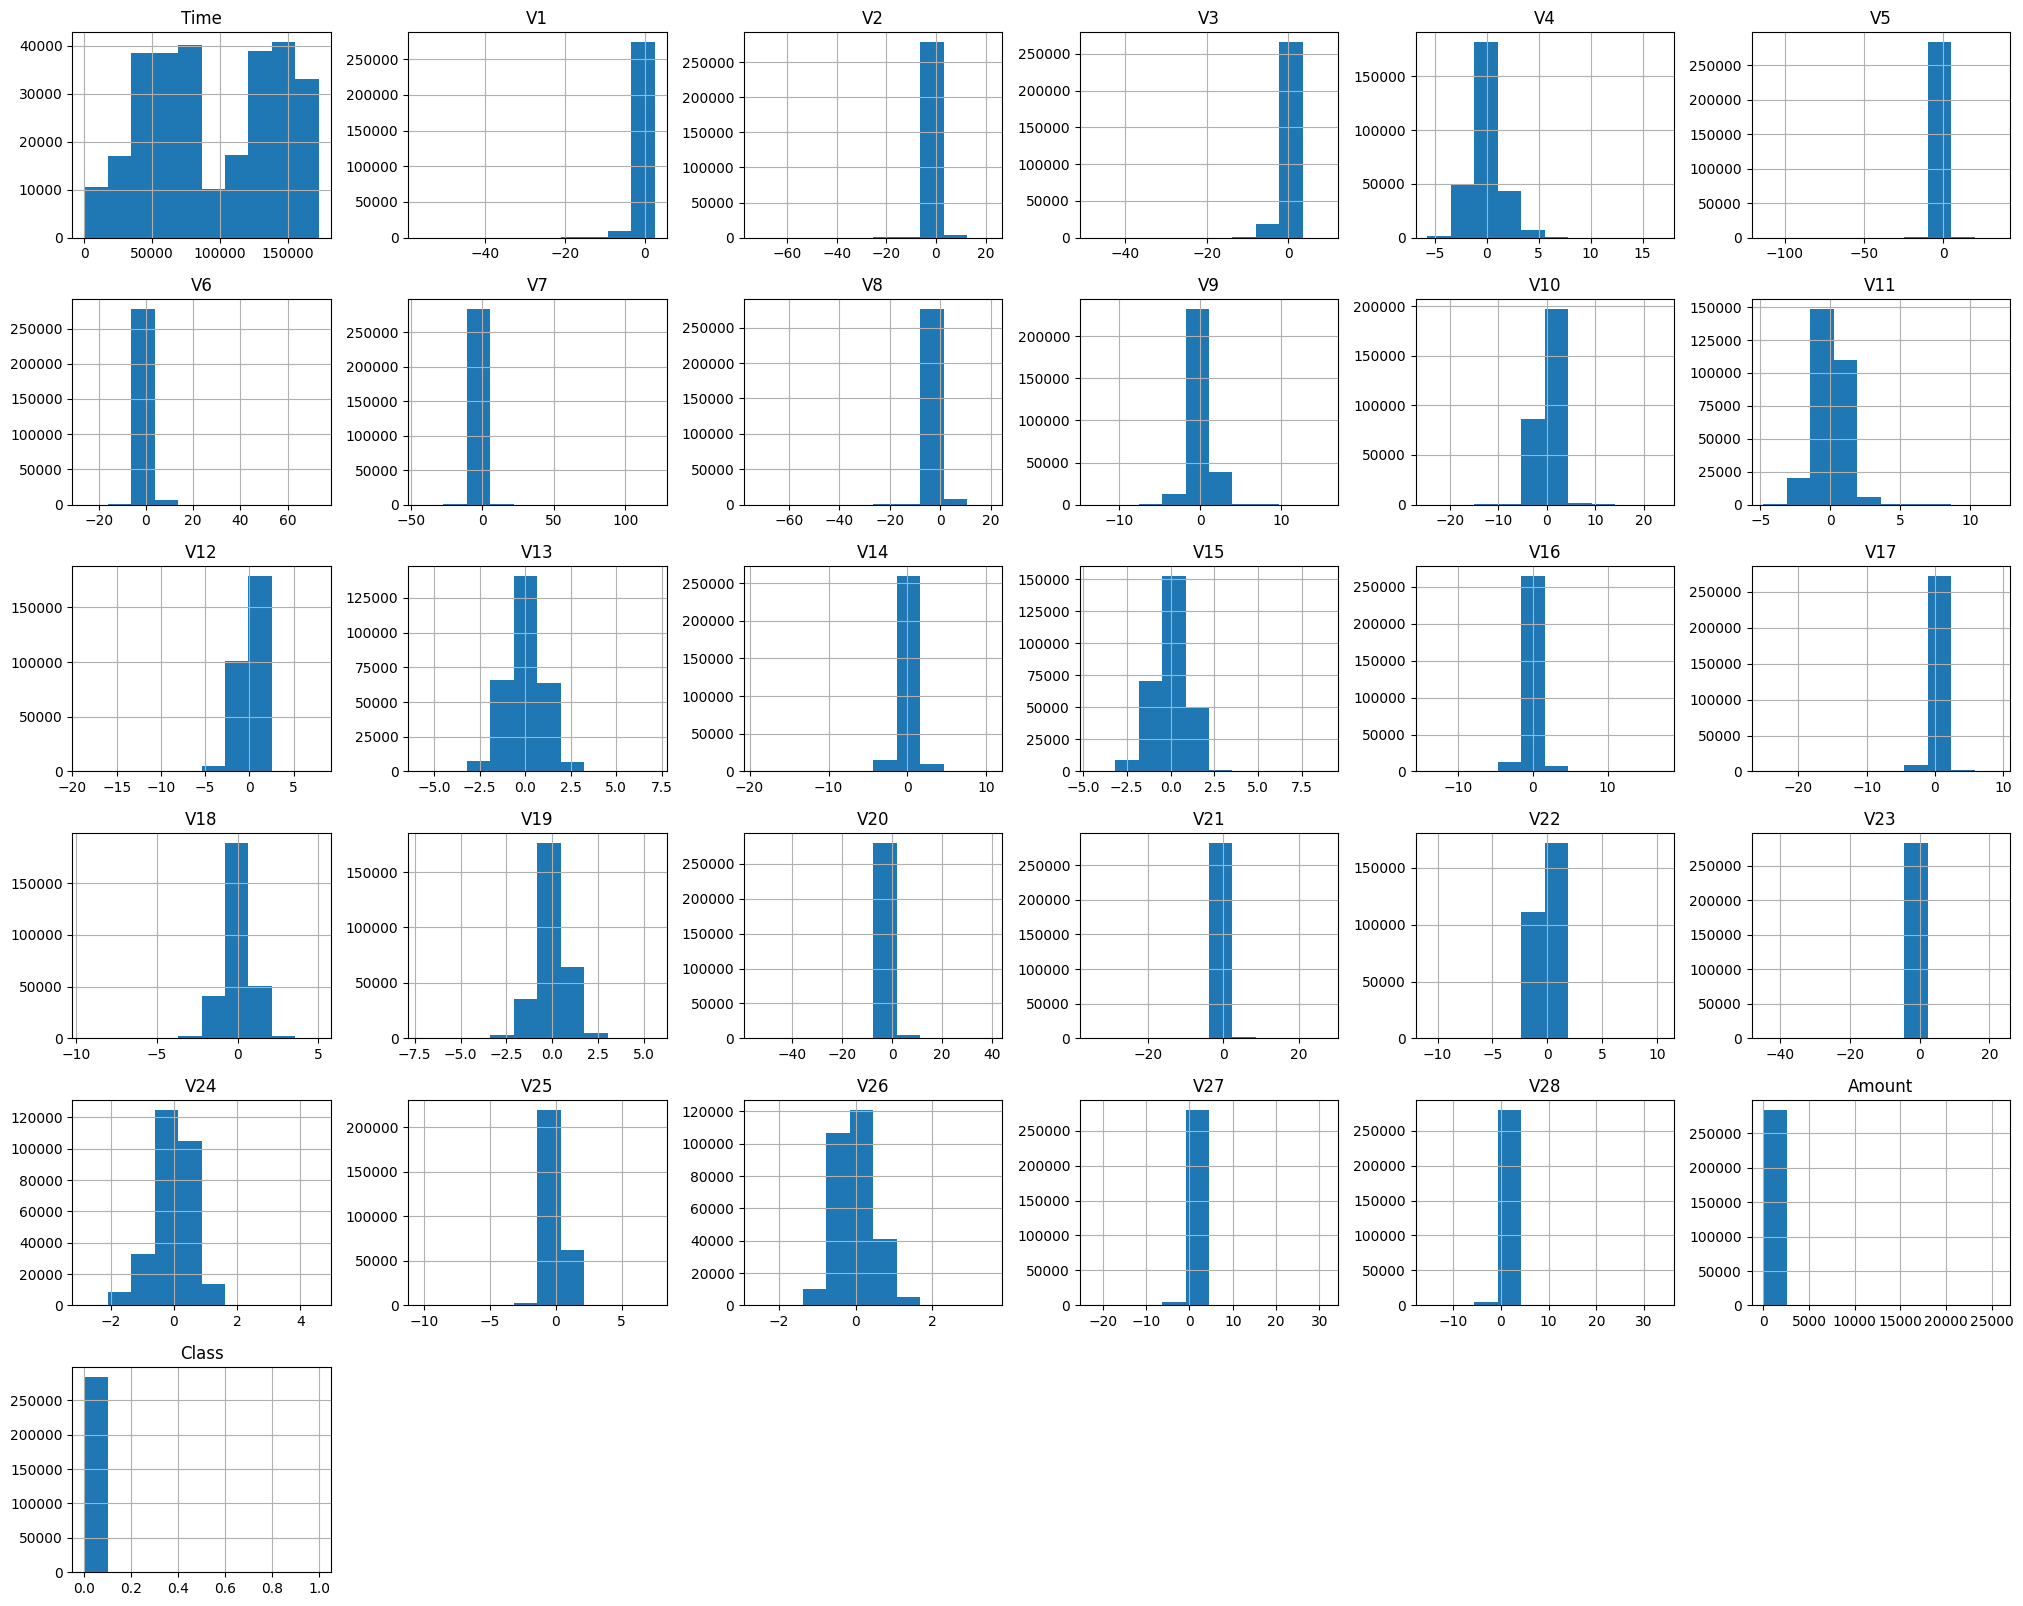

In [13]:
df.hist(figsize=(25,20))
plt.show()

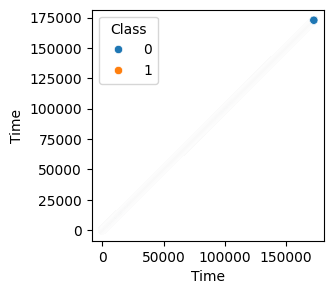

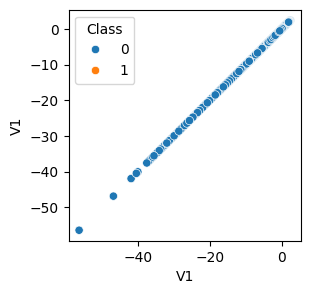

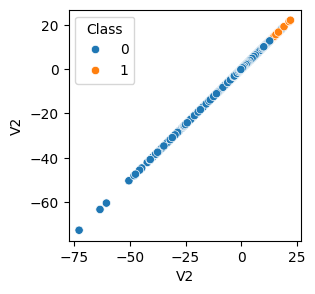

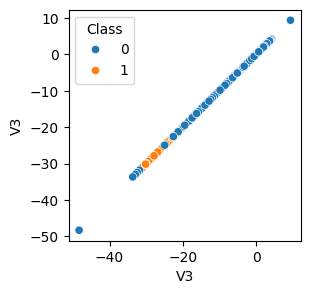

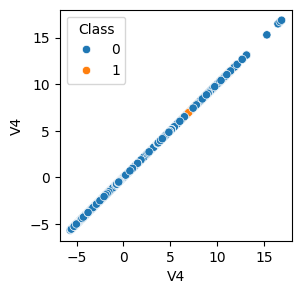

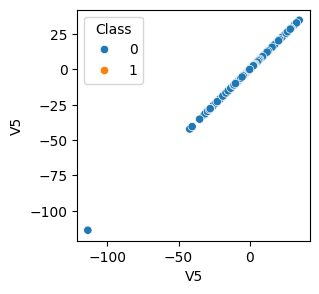

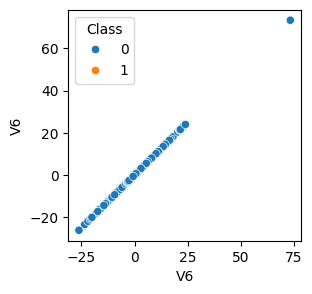

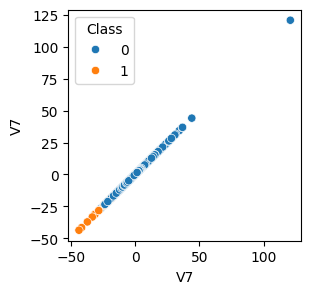

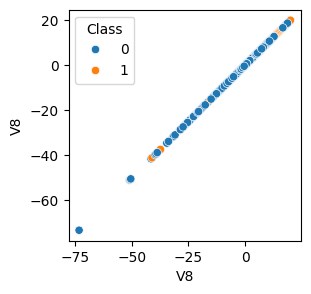

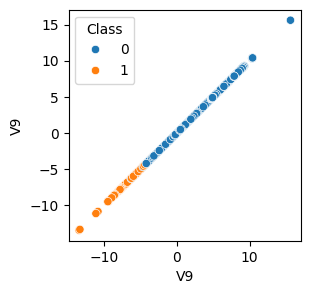

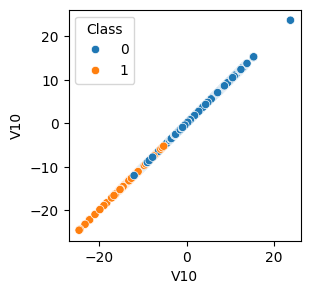

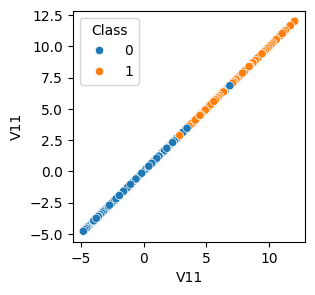

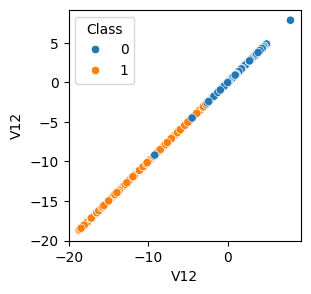

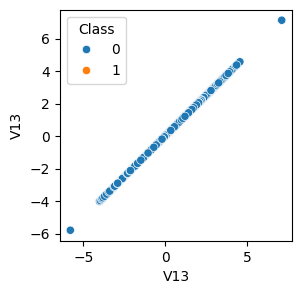

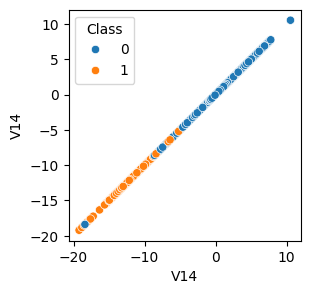

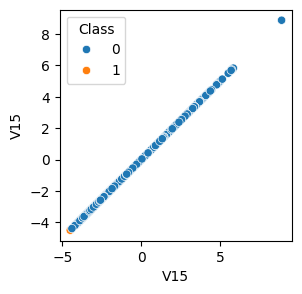

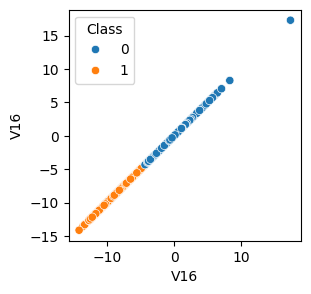

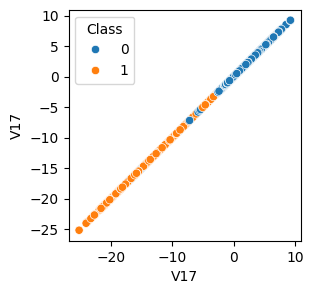

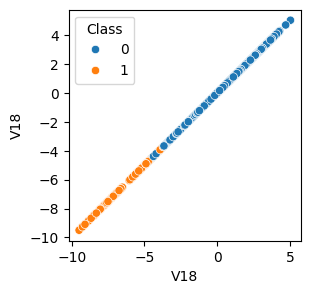

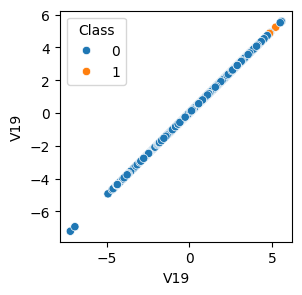

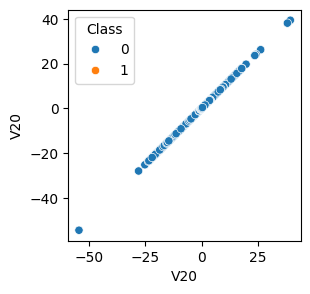

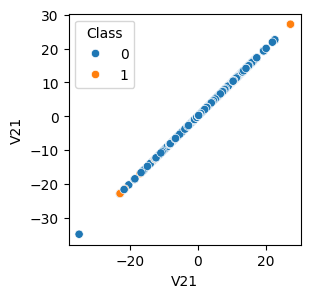

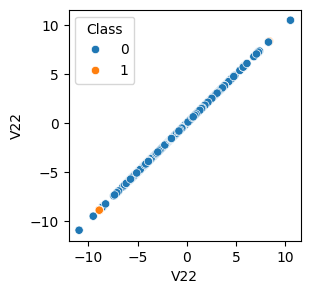

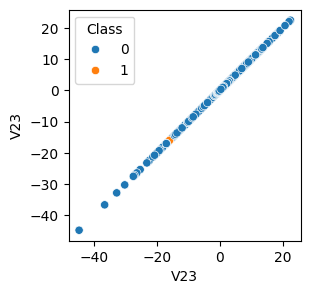

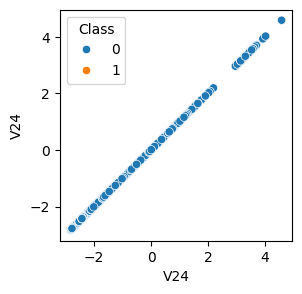

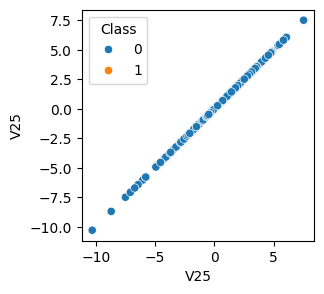

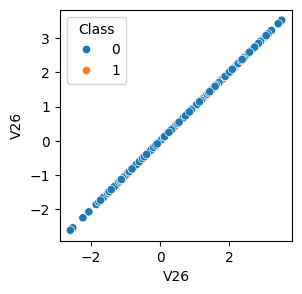

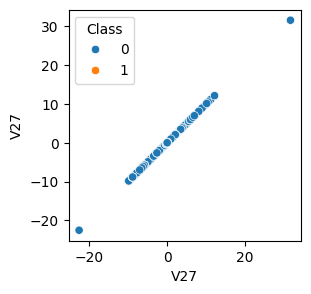

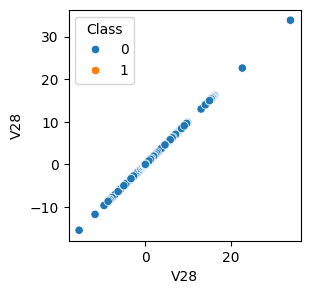

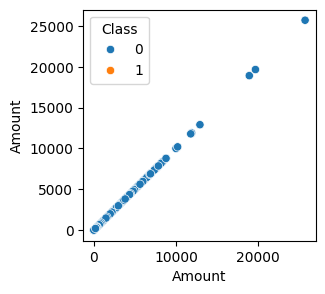

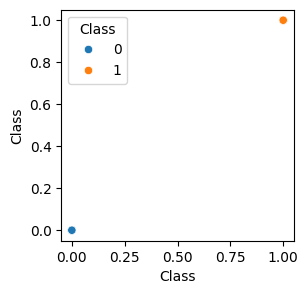

In [14]:
import numpy as np

features = list(df.columns)  # Assuming "Class" is not a feature
correlations = np.abs(df.corr())  # Get absolute correlations
strong_correlations = np.where(correlations > 0.7)  # Adjust threshold as needed
feature_pairs = [(features[i], features[j]) for i, j in zip(*strong_correlations)]



for x, y in feature_pairs:
    plt.figure(figsize=(3,3))
    #plt.subplots(2,2,figsize=(3,3) )
    sns.scatterplot(x=x, y=y, hue="Class", data=df, palette="tab10")
    plt.show()


In [15]:
#sns.pairplot(df.sample(1000), hue="Class", palette="tab10")
#plt.show()
# Reduce data size (optional)
# sample_size = 1000
# df_sample = df.sample(sample_size)

# Use individual scatter plots
#import matplotlib.pyplot as plt

#features = list(df.columns)  # Assuming "Class" is not a feature

#for i in range(len(features) - 1):
#  for j in range(i + 1, len(features)):
#    sns.scatterplot(
#        x=features[i], y=features[j], hue="Class", data=df, palette="tab10",
#    )
#    plt.show()  # Display each plot individually

# Free up memory (optional)
import gc; gc.collect()


48600

## Data Cleansing
* Since, the number of instances of 0 is 284315 and for Class 1 it is mere 492, we need to resolve data imbalance. This could be done by either Over-Sampling or Under-Sampling
* But prior to that, we need to figure out instances of duplicates and clean the data from such instances

### Removing Duplicates

In [16]:
df.duplicated().any
df.duplicated().sum()

1081

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 3. Solving Data Imbalance Problem

#### Get X-Axis and Y-Axis data

In [18]:
# Taking columns v1 to v28 plus amount and remocing Class
x= df.iloc[:,1:29].values # Remove .values to view data in tabular structure
x

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [19]:
# Considering class as Y attribute
y = df.iloc[:,30].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### A. Under-Sampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
rus = RandomUnderSampler(random_state=1)  # Set a random state for reproducibility

# Fit and apply the undersampling to your data
x_resampled, y_resampled = rus.fit_resample(x, y)

# Print the resampled data
print(x_resampled)
print(y_resampled)

[[ 1.44928145e+00 -9.36518066e-01  5.68020021e-01 ... -1.99576142e-01
   5.15728964e-02  2.29463789e-02]
 [-8.74473219e-01 -8.06518745e-01  2.95438135e+00 ...  2.80355943e-02
   2.22181630e-01  1.26069891e-01]
 [-1.29252477e+00 -4.81549366e-01  1.40357461e+00 ... -1.31426838e-01
   3.48896766e-01  4.74809350e-02]
 ...
 [-6.76142671e-01  1.12636606e+00 -2.21369952e+00 ...  4.71110963e-01
   3.85107449e-01  1.94361479e-01]
 [-3.11383161e+00  5.85864172e-01 -5.39973021e+00 ...  6.06115810e-01
   8.84875540e-01 -2.53700319e-01]
 [ 1.99197610e+00  1.58475887e-01 -2.58344065e+00 ... -2.89616586e-01
   2.98758224e-03 -1.53088128e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [21]:
from collections import Counter
Counter(y_resampled).items()
# Now, we can see that the data for both Class 0 and Clas 1 are now same. So the data is Balanced.

dict_items([(0, 473), (1, 473)])

## Data Division into test and train data

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x_resampled,y_resampled, test_size = 0.2, random_state=42)

print("X-train", len(x_train))
print("X-test", len(x_test))
print("Y-train", len(y_train))
print("Y-test", len(y_test))

labels = ['Class 0', 'Class 1']

X-train 756
X-test 190
Y-train 756
Y-test 190


# 2. Applying Models and Prediction of Fraud

### Helper Functions (To be used during Modelling and Prediction)

In [23]:
# Dictionary to store model result
comparison_results = {}

In [24]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def show_result(y_test, y_pred, labels):
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy::  {accuracy:.2f}")
    
#     precision = precision_score(y_test, y_pred)
#     print(f"Precision Score::  {precision:.2f}")
    
#     recall = recall_score(y_test, y_pred)
#     print(f"Recall Score::  {recall:.2f}")
    
#    # f1score = f1_score(precision, recall)
#     #print(f"F1-Score::  {f1score:.2f}")
    
#     confusion_matrix(y_test, y_pred)
#     plot_confusion_matrix(y_test, y_pred, labels)
#     plot_roc_curve(y_test, y_pred)
#     plot_predicted_probability_distribution(y_pred)
    
#     return {"accuracy" : accuracy, "precision" : precision, "recall" : recall}


## 2. Training a Quantum Machine Learning Model

In [25]:
from qiskit.circuit.library import ZZFeatureMap

num_examples, num_features = x_resampled.shape
#print(x_train)
#print(num_features)

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#print(feature_map)

#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

feature_map.decompose().draw(output="text", style="clifford")

┌───┐┌─────────────┐                                                »
 q_0: ┤ H ├┤ P(2.0*x[0]) ├───■────────────────────────────────────■────■──»
      ├───┤├─────────────┤ ┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
 q_1: ┤ H ├┤ P(2.0*x[1]) ├─┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
      ├───┤├─────────────┤ └───┘└──────────────────────────────┘└───┘┌─┴─┐»
 q_2: ┤ H ├┤ P(2.0*x[2]) ├───────────────────────────────────────────┤ X ├»
      ├───┤├─────────────┤                                           └───┘»
 q_3: ┤ H ├┤ P(2.0*x[3]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_4: ┤ H ├┤ P(2.0*x[4]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_5: ┤ H ├┤ P(2.0*x[5]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_6: ┤ H ├┤ P(2.0*x[6]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_7: ┤ H ├┤ P(2.0*x[7]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_8: ┤ H ├┤ P(2.0*x[8]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┤                                                »
 q_9: ┤ H ├┤ P(2.0*x[9]) ├────────────────────────────────────────────────»
      ├───┤├─────────────┴┐                                               »
q_10: ┤ H ├┤ P(2.0*x[10]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_11: ┤ H ├┤ P(2.0*x[11]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_12: ┤ H ├┤ P(2.0*x[12]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_13: ┤ H ├┤ P(2.0*x[13]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_14: ┤ H ├┤ P(2.0*x[14]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_15: ┤ H ├┤ P(2.0*x[15]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_16: ┤ H ├┤ P(2.0*x[16]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_17: ┤ H ├┤ P(2.0*x[17]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_18: ┤ H ├┤ P(2.0*x[18]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_19: ┤ H ├┤ P(2.0*x[19]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_20: ┤ H ├┤ P(2.0*x[20]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_21: ┤ H ├┤ P(2.0*x[21]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_22: ┤ H ├┤ P(2.0*x[22]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_23: ┤ H ├┤ P(2.0*x[23]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_24: ┤ H ├┤ P(2.0*x[24]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                                               »
q_25: ┤ H ├┤ P(2.0*x[25]) ├───────────────────────────────────────────────»
      ├───┤├──────────────┤                           

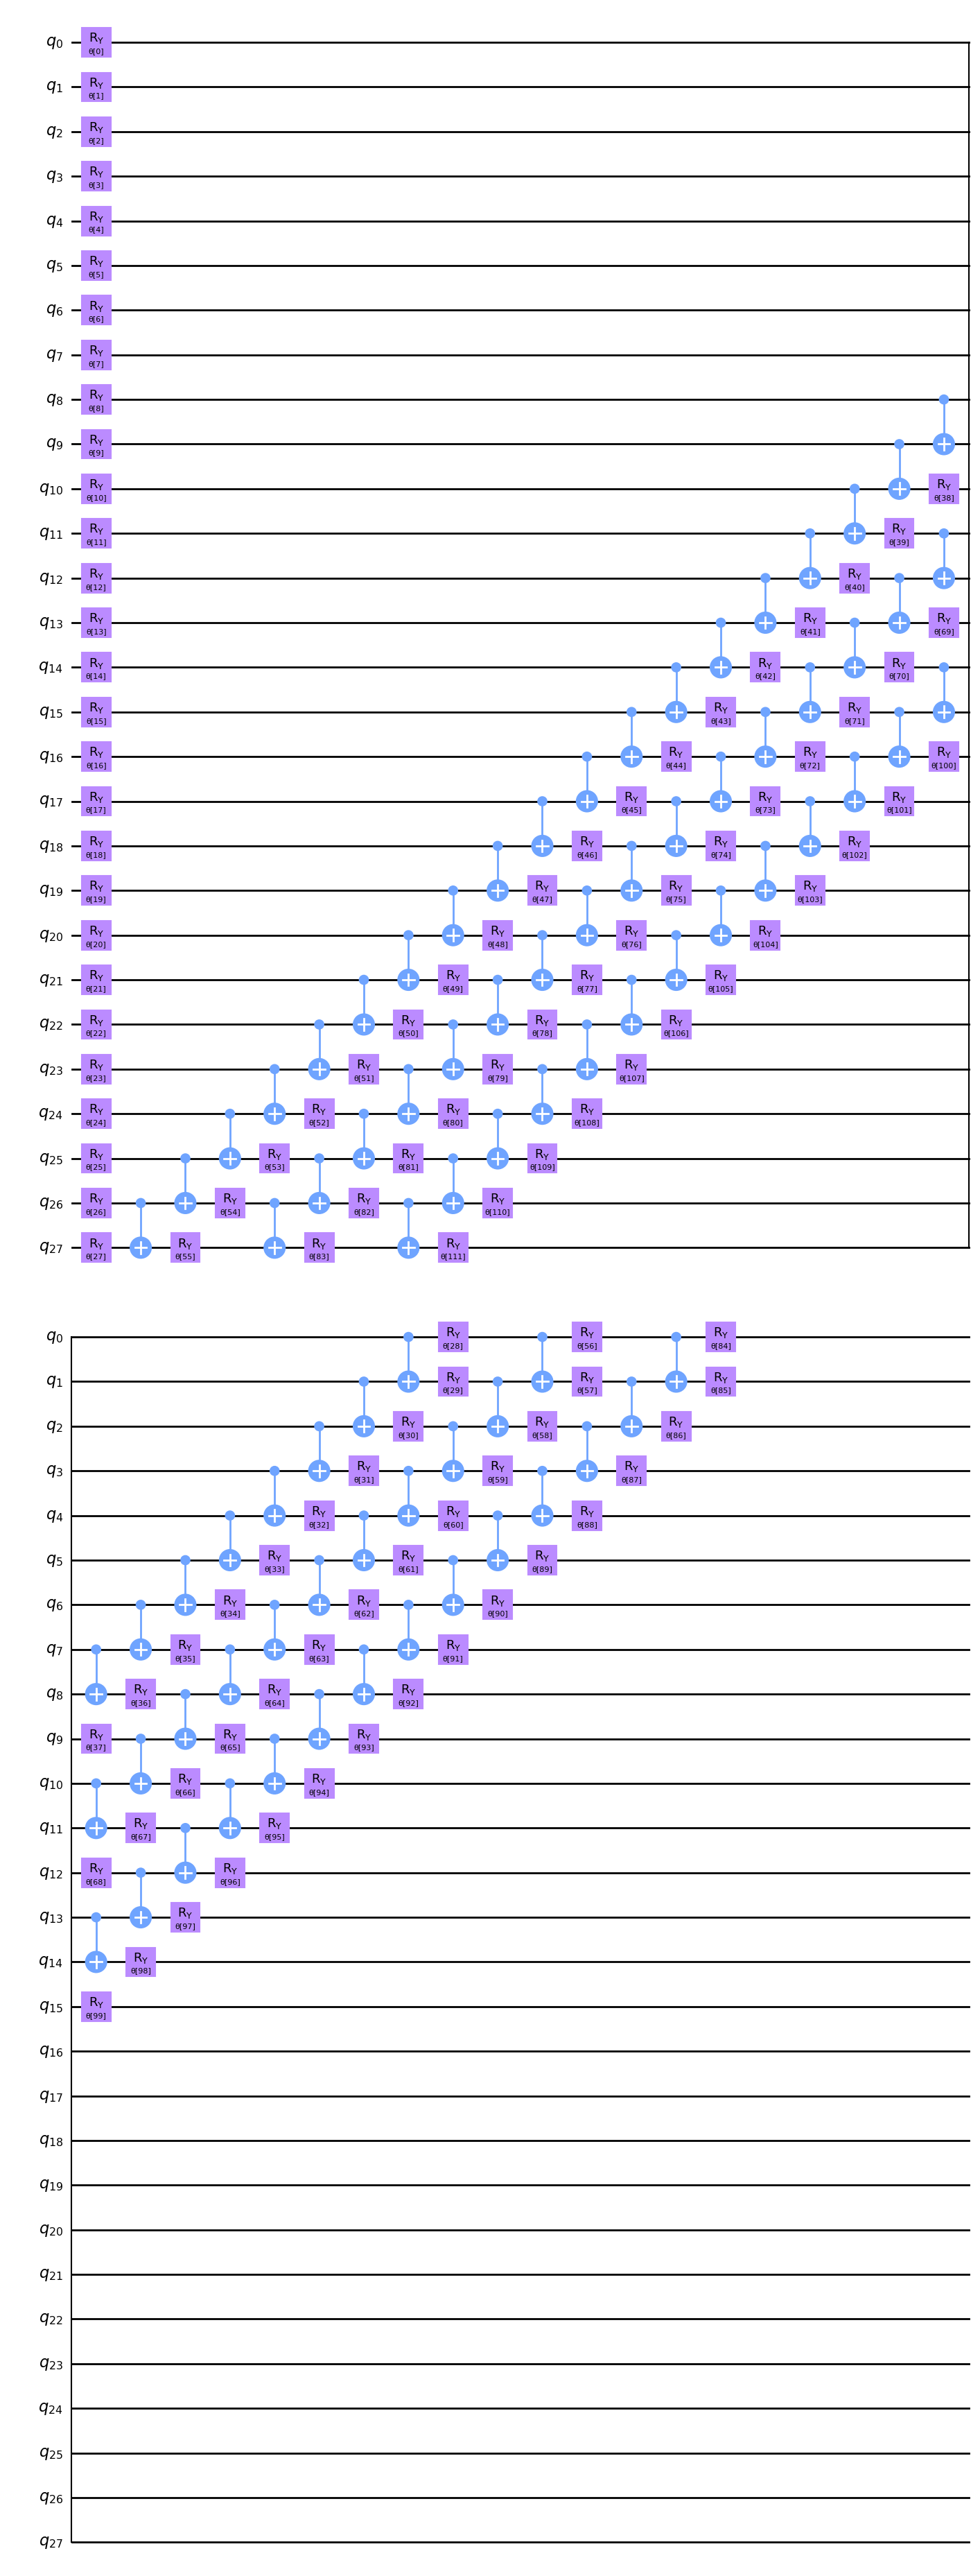

In [26]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [27]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [28]:
! pip install qiskit_machine_learning qiskit_ibm_runtime

In [29]:
from apitoken import get_api_token
token = get_api_token()


In [30]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=token
)

In [31]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [32]:
backend = service.backend("ibm_brisbane")

In [33]:
! pip install qiskit-aer

In [34]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

In [35]:
''' 
Zero padding is to make the number of features equal to a power of 2.
it is required for 'amplitude encoding' given below.
'''

n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
X = np.append(x_resampled, zeros, axis=1)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

(number of qubits, dimension of the Hilbert space) = (5, 32)
number of examples =  946
number of features =  32


### Amplitude Encoding

In [36]:
from qiskit_machine_learning.circuit.library import RawFeatureVector


fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw() 

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_2: ┤2 Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31]) ├
«     │                                                                                                                                                                                                                 │
«q_3: ┤3                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                ├
«     └─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [37]:
from qiskit.circuit.library import RealAmplitudes


'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

# Implementing VQC

In [38]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
import gc; gc.collect()

from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

from qiskit import QuantumCircuit
from qiskit_aer import Aer

optimizer = COBYLA(maxiter=150)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz, #pqc
    optimizer=optimizer,
    callback=callback_graph,
   
)

# clear objective value history
objective_func_vals = []



NameError: name 'x_train_scaled' is not defined

In [40]:
start = time.time()
vqc.fit(x_train[:10], y_train[:10])
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

QiskitMachineLearningError: 'Sampler job failed.'

In [ ]:
circuit = QuantumCircuit(vqc.get_qubits())
shots = 1024

job = backend.run(circuit, shots=shots)

counts = job.results().get_counts(circuit)

print("Circuit counts:", counts)

In [ ]:
train_score = vqc.score(x_train, y_train)
test_score = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

## Error: Unfortunately VQC is resulting into Terminal error. so lets try different QML Algorithm

In [ ]:
from qiskit_machine_learning.algorithms.classifiers import QSVC

In [ ]:
qsvc = QSVC(quantum_kernel=None)
qsvc.fit(x_train[:10],y_train[:10])




In [ ]:
qsvc.predict(x_test)

# 3. Conclusion

In [ ]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(comparison_results).transpose()  # Transpose for better table view

# Print the table
print(df)

# Create a bar chart for accuracy
plt.figure(figsize=(14, 12))
plt.bar(df.index, df["accuracy"])
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()